In [1]:
!pip install --upgrade librosa

In [2]:
import os
import numpy as np
import pretty_midi
import matplotlib.pyplot as plt
import librosa

In [3]:
l = os.listdir('Data train')

In [4]:
lis=[]
for arch in l:
    if arch.endswith('.txt'):
        lis.append(arch)

In [5]:
import random

In [11]:
r = random.randrange(0,len(lis)) 
aux,sr = librosa.core.load('Data train/'+lis[r].replace('.txt','.wav'),sr=44100, mono=True)
X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
X_test=X_test.T

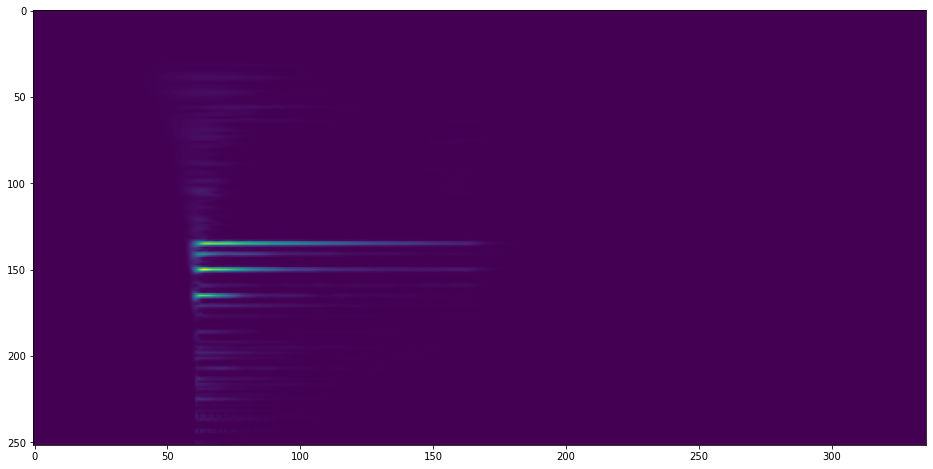

In [12]:
plt.figure(figsize=(16, 8))
plt.imshow(X_test.T, aspect="auto")

In [13]:
f=open('Data train/'+lis[r])
L=f.readlines()
f.close()
k = float(L[1].split()[0])
j = float(L[1].split()[1])
print(k,j)
k1=librosa.time_to_frames(k, sr=sr)
j1=librosa.time_to_frames(j, sr=sr)
print(k1,j1)

0.700003 1.9
60 163


In [15]:
sfpm=(j-k)/8
X_test=X_test[k1:j1]
x = np.zeros((8,252))
for i in range(8):
    x[i]=np.sum(X_test[librosa.time_to_frames(i*sfpm):min(librosa.time_to_frames((i+1)*sfpm),X_test.shape[0])],axis=0)/(min(librosa.time_to_frames((i+1)*sfpm),X_test.shape[0])-librosa.time_to_frames(i*sfpm))

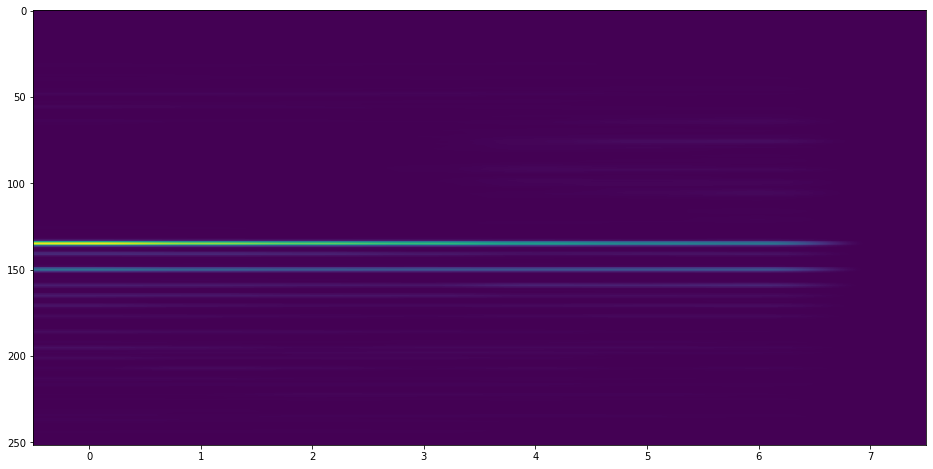

In [16]:
plt.figure(figsize=(16, 8))
plt.imshow(x.T, aspect="auto")

In [17]:
f=open('Data train/'+lis[0],'r') 
L=f.readlines()
f.close()
k = float(L[1].split()[0])
j = float(L[1].split()[1])
y=np.zeros((8,88))
for j in range(1,len(L)):
    c = int(L[j].split()[2])-21
    for m in range(y.shape[0]):
        y[m][c]=1

        
aux,sr = librosa.core.load('Data train/'+lis[0].replace('.txt','.wav'),sr=44100, mono=True)
X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))

sfpm=(j-k)/8
X_test=X_test.T
X_test=X_test[librosa.time_to_frames(k, sr=sr):librosa.time_to_frames(j, sr=sr)]

k = 0
j = librosa.time_to_frames(sfpm, sr=sr)
x = np.zeros((8,252))
x[0]=np.sum(X_test[k:j],axis=0)/j

for i in range(1,8):
    k = librosa.time_to_frames(sfpm*i, sr=sr)+1
    j = librosa.time_to_frames(sfpm*(i+1), sr=sr)
    x[i]=np.sum(X_test[k:min(j,X_test.shape[1])],axis=0)/(min(j,X_test.shape[1])-k)

In [18]:
for i in range(1,len(lis)):
    f=open('Data train/'+lis[i],'r') 
    L=f.readlines()
    f.close()
    k = float(L[1].split()[0])
    j = float(L[1].split()[1])
    y2 = np.zeros((8,88))
    for l in range(1,len(L)):
        c = int(L[l].split()[2])-21
        for m in range(y2.shape[0]):
            y2[m][c]=1
    y = np.concatenate((y,y2))
    
    aux,sr = librosa.core.load('Data train/'+lis[i].replace('.txt','.wav'),sr=44100, mono=True)
    X_ = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
    
    sfpm=(j-k)/8
    X_=X_.T
    X_=X_[librosa.time_to_frames(k, sr=sr):librosa.time_to_frames(j, sr=sr)]
    k = 0
    j = librosa.time_to_frames(sfpm, sr=sr)
    x2 = np.zeros((8,252))
    x2[0] = np.sum(X_[k:j],axis=0)/j
    for l in range(1,8):
        k = librosa.time_to_frames(sfpm*l, sr=sr)+1
        j = librosa.time_to_frames(sfpm*(l+1), sr=sr)
        x2[l]=np.sum(X_[k:min(j,X_.shape[1])],axis=0)/(min(j,X_.shape[1])-k)
    x = np.concatenate((x,x2))
    if i%100 == 0:
        print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


C:\Users\Emmanuel Salazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=831
  return f(*args, **kwargs)


1800
1900
2000


C:\Users\Emmanuel Salazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=782
  return f(*args, **kwargs)


In [19]:
aux,sr = librosa.core.load( 'MAPS\AkPnBcht\MUS\MAPS_MUS-bach_846_AkPnBchtx2.wav',sr=44100, mono=True)

In [20]:
X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))

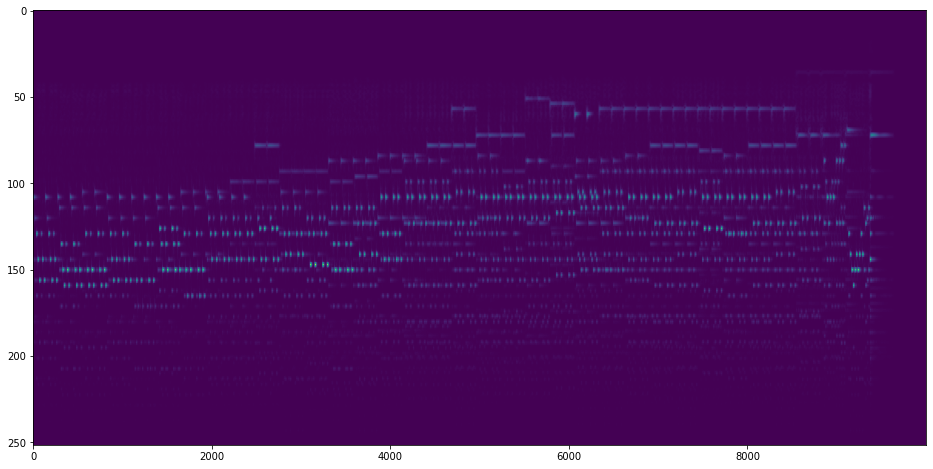

In [21]:
plt.figure(figsize=(16, 8))
plt.imshow(X_test[:,:10000], aspect="auto")

In [22]:
X_test=X_test[:,:10000]

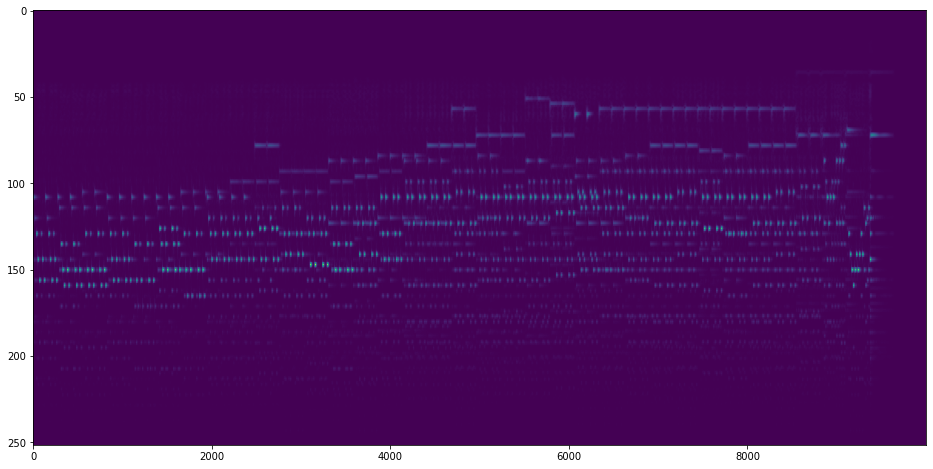

In [23]:
plt.figure(figsize=(16, 8))
plt.imshow(X_test, aspect="auto")

In [24]:
bpm=75
sfpm=((60/75)/8)
sfpm

0.1

In [25]:
import math

In [26]:
X_roll=np.zeros((math.ceil(librosa.frames_to_time(X_test.shape[1],sr=sr)/sfpm),252))
k = 0
j = librosa.time_to_frames(sfpm, sr=sr)
X_roll[0]=np.sum(X_test[:,k:j],axis=1)/j
for i in range(1,X_roll.shape[0]):
    k = librosa.time_to_frames(sfpm*i, sr=sr)+1
    j = librosa.time_to_frames(sfpm*(i+1), sr=sr)
    X_roll[i]=np.sum(X_test[:,k:min(j,X_test.shape[1])],axis=1)/(min(j,X_test.shape[1])-k)

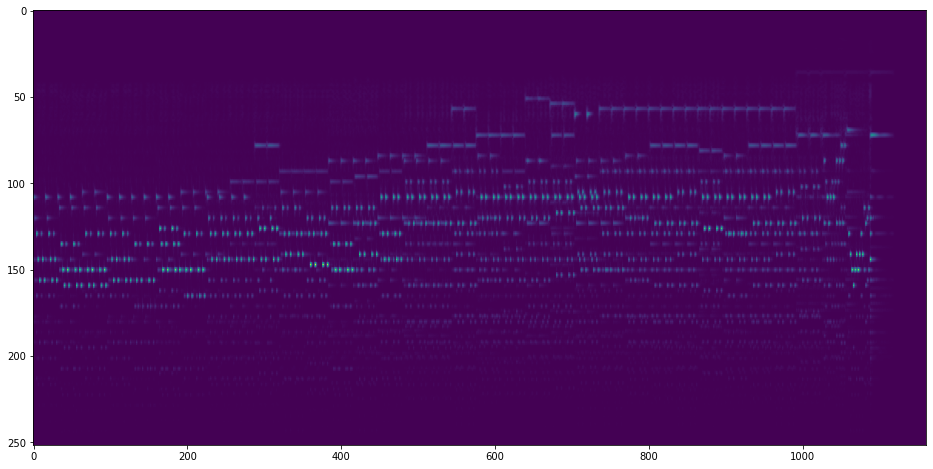

In [27]:
plt.figure(figsize=(16, 8))
plt.imshow(X_roll.T, aspect="auto")

In [28]:
pretty_midi.pretty_midi.MAX_TICK = 1e10
f = pretty_midi.PrettyMIDI(midi_file= "MAPS/AkPnBcht/MUS/MAPS_MUS-bach_846_AkPnBchtx2.mid")
File = "MAPS/AkPnBcht/MUS/MAPS_MUS-bach_846_AkPnBchtx2.wav"

C:\Users\Emmanuel Salazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pretty_midi\pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


In [29]:
piano_roll = np.zeros((math.ceil(librosa.frames_to_time(X_test.shape[1],sr=sr)/sfpm),88))
k=0
for i in range(f.get_piano_roll(20).shape[1]):
    if k >= 1161:
        break
    if i%4==0 or i%4==1:
        piano_roll[k]=f.get_piano_roll(20)[21:109,i]
        k=k+1 

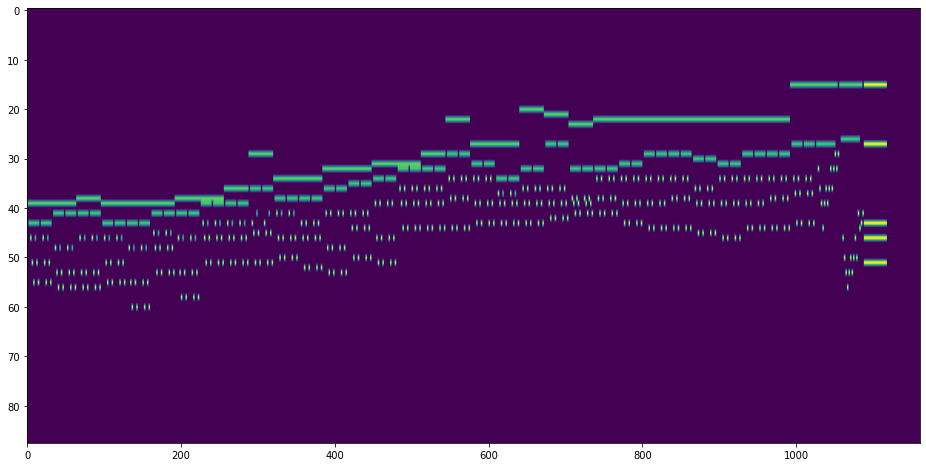

In [30]:
plt.figure(figsize=(16, 8))
plt.imshow(piano_roll.T, aspect="auto")

In [31]:
stat = dict()
stat['mean'] =np.mean(x,axis=0)
stat['std'] = np.std(x,axis=0)

In [32]:
def batch(iterable, n):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]
def normal(stat, feature_matrix):
    return np.nan_to_num((feature_matrix - stat['mean']) / stat['std'])
def normal2(matrix):
    aux  = matrix.T
    print("Normalizing...")
    for idx in batch(np.arange(aux.shape[0]), 1000):
        aux[idx, :] = normal(stat , aux[idx, :])
    return aux

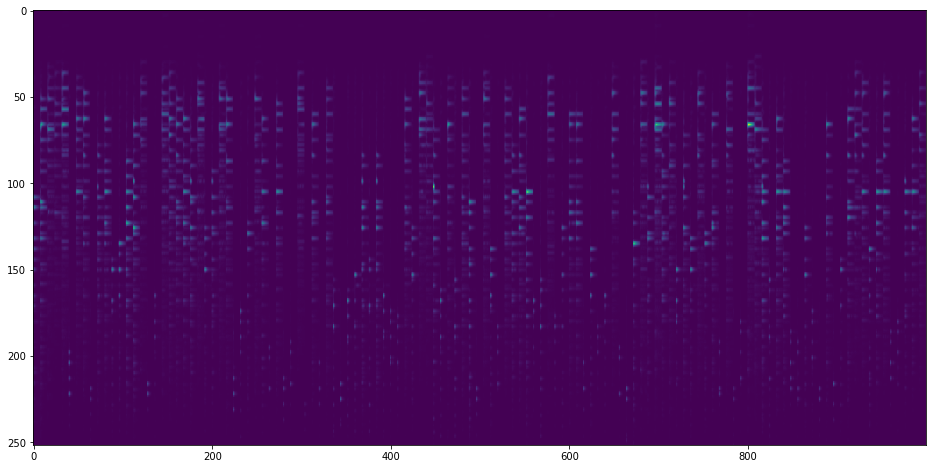

In [35]:
plt.figure(figsize=(16, 8))
plt.imshow(x[5000:6000].T, aspect="auto")

In [36]:
import numpy as np
np.save('Res Fusa/x_value.npy', x)
np.save('Res Fusa/y_value.npy', y)
np.save('Res Fusa/X_test_value.npy', X_roll)
np.save('Res Fusa/Y_test_value.npy', piano_roll)
np.save('Res Fusa/x_mean.npy', np.mean(x,axis=0))
np.save('Res Fusa/x_std.npy', np.std(x,axis=0))

In [37]:
x = normal2(x.T)
X_test = normal2(X_roll.T)

Normalizing...
Normalizing...


In [38]:
np.save('x_value_norm.npy', x)
np.save('X_test_value_norm.npy', X_roll)

In [30]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))


In [31]:
import librosa.display

C:\Users\Emmanuel Salazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  return f(*args, **kwargs)


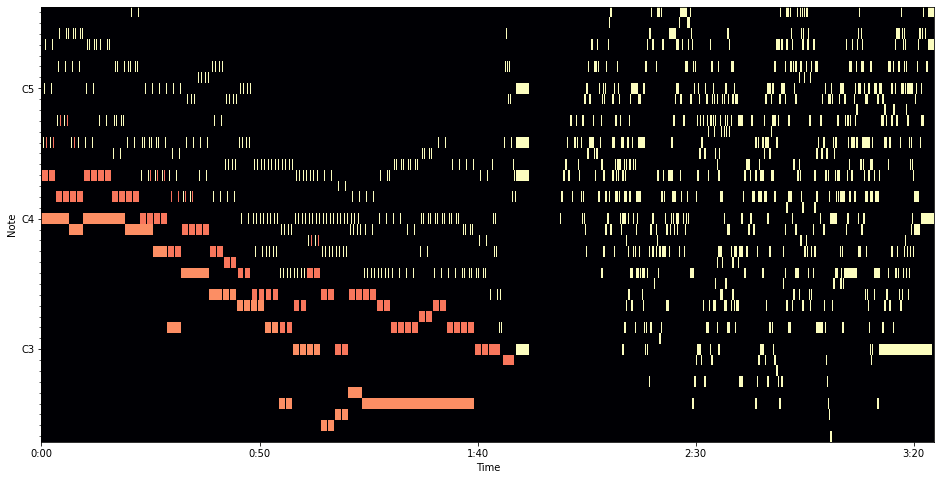

In [32]:
plt.figure(figsize=(16, 8))
plot_piano_roll(f,40,80)

In [80]:
f.get_piano_roll(100)[40:80]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 80., 80., 80.]])

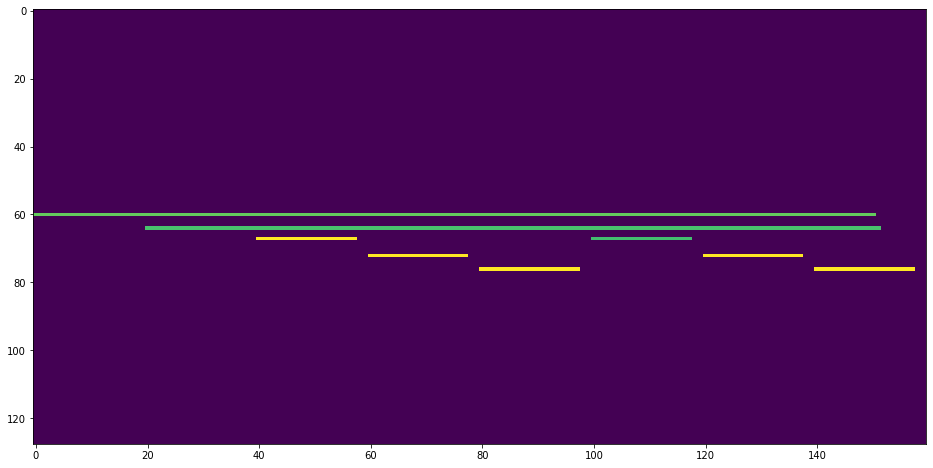

In [85]:
plt.figure(figsize=(16, 8))
plt.imshow(f.get_piano_roll(100)[:,:160], aspect="auto")

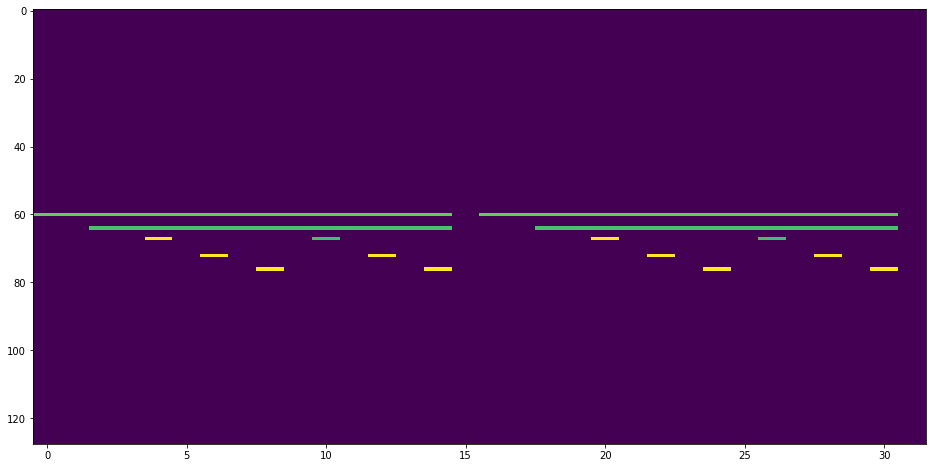

In [214]:
plt.figure(figsize=(16, 8))
plt.imshow(f.get_piano_roll(10)[:,:32], aspect="auto")

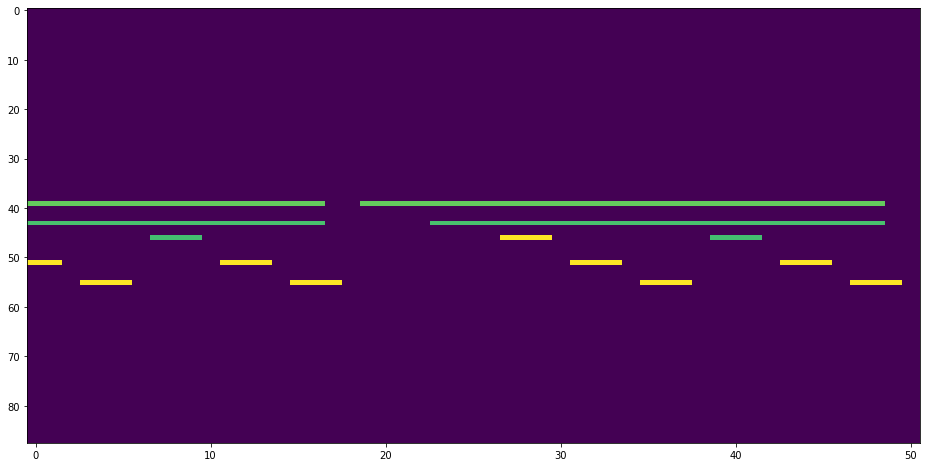

In [304]:
plt.figure(figsize=(16, 8))
plt.imshow(f.get_piano_roll(20)[21:109,13:64], aspect="auto")

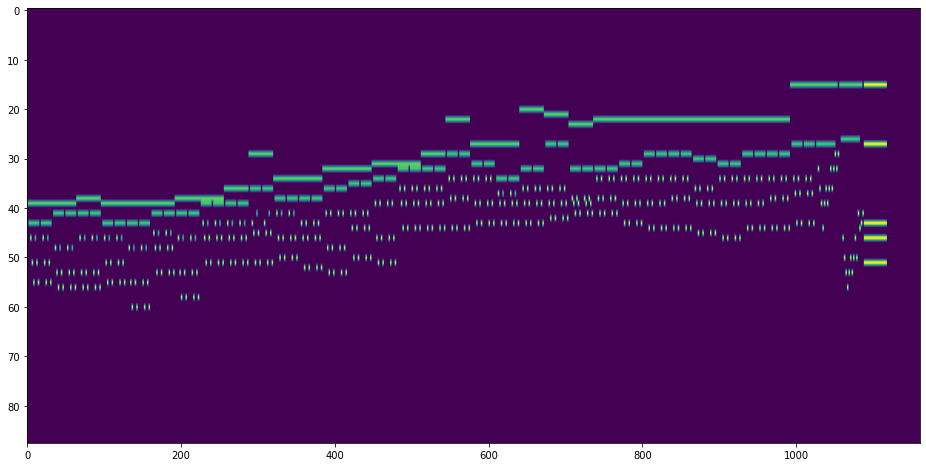

In [322]:
plt.figure(figsize=(16, 8))
plt.imshow(piano_roll.T, aspect="auto")